In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorboard
import seaborn as sns

In [ ]:
# Loading the data

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Checking The Data For Null Values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

In [ ]:
# Checking Some Important Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
# Droping Unecessary Features

df.drop(["car_ID", "symboling", "CarName"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


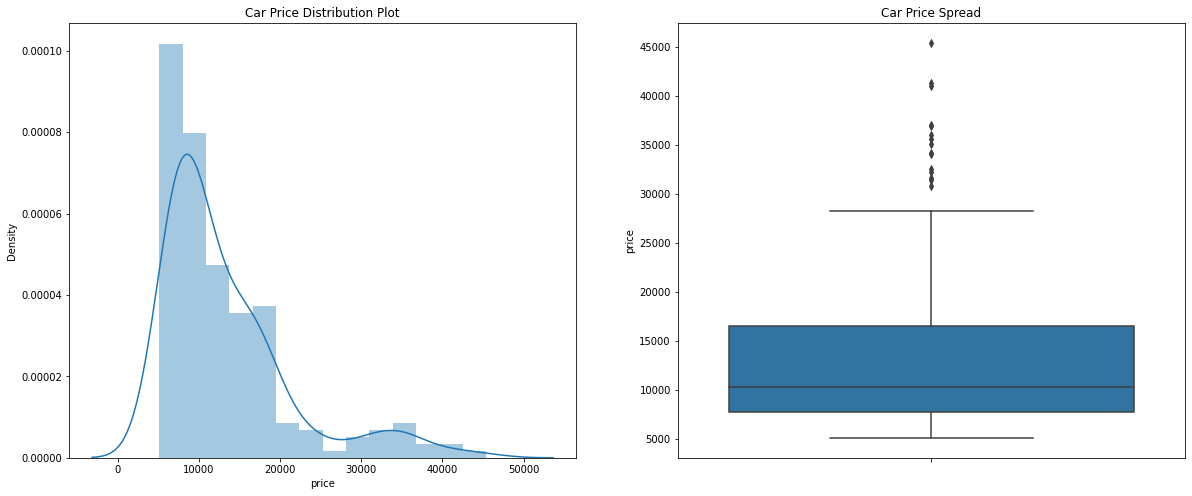

In [ ]:
# Visualizing The Data

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

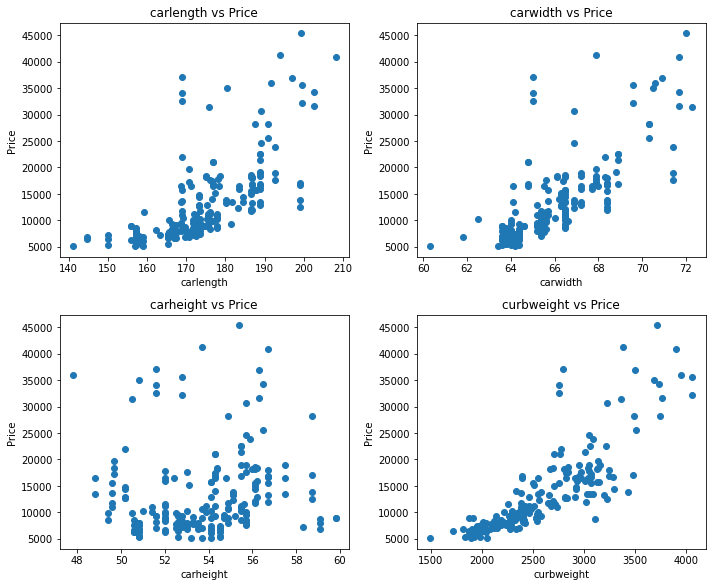

In [ ]:
# Plotting Numerical Features

def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [ ]:
# Converting Alphabetical Features Into Numerical Features

import sklearn
labelencoder = sklearn.preprocessing.LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem'])
df['doornumber'] = labelencoder.fit_transform(df['doornumber'])
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])

In [ ]:
# Checking New DataFrame

df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Shuffling Data

df = df.sample(frac=1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
51,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1900,3,2,91,1,3.03,3.150,9.0,68,5000,31,38,6095.0
100,1,0,0,3,1,0,97.2,173.4,65.2,54.7,2302,3,2,120,1,3.33,3.470,8.5,97,5200,27,34,9549.0
19,1,0,1,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.110,9.6,70,5400,38,43,6295.0
75,1,1,1,2,2,0,102.7,178.4,68.0,54.8,2910,3,2,140,5,3.78,3.120,8.0,175,5000,19,24,16503.0
56,1,0,1,2,2,0,95.3,169.0,65.7,49.6,2380,6,6,70,2,3.33,3.255,9.4,101,6000,17,23,11845.0


In [ ]:
# Splitting The Dataset Into Training and Testing Data

train_data = df.iloc[:144,:]
train_data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
51,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1900,3,2,91,1,3.03,3.150,9.0,68,5000,31,38,6095.0
100,1,0,0,3,1,0,97.2,173.4,65.2,54.7,2302,3,2,120,1,3.33,3.470,8.5,97,5200,27,34,9549.0
19,1,0,1,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.110,9.6,70,5400,38,43,6295.0
75,1,1,1,2,2,0,102.7,178.4,68.0,54.8,2910,3,2,140,5,3.78,3.120,8.0,175,5000,19,24,16503.0
56,1,0,1,2,2,0,95.3,169.0,65.7,49.6,2380,6,6,70,2,3.33,3.255,9.4,101,6000,17,23,11845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,1,0,4,0,0,96.9,173.6,65.4,54.9,2650,4,2,108,5,3.62,2.640,7.7,111,4800,23,23,11694.0
193,1,0,0,4,1,0,100.4,183.1,66.9,55.1,2563,3,2,109,5,3.19,3.400,9.0,88,5500,25,31,12290.0
157,1,0,0,2,1,0,95.7,166.3,64.4,52.8,2109,3,2,98,1,3.19,3.030,9.0,70,4800,30,37,7198.0
69,0,1,1,1,2,0,106.7,187.5,70.3,54.9,3495,3,1,183,3,3.58,3.640,21.5,123,4350,22,25,28176.0


In [ ]:
test_data = df.iloc[145:,:]
test_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
53,1,0,0,3,1,0,93.1,166.8,64.2,54.1,1945,3,2,91,1,3.03,3.15,9.0,68,5000,31,38,6695.0
204,1,1,0,3,2,0,109.1,188.8,68.9,55.5,3062,3,2,141,5,3.78,3.15,9.5,114,5400,19,25,22625.0
147,1,0,0,4,1,0,97.0,173.5,65.4,53.0,2455,4,2,108,5,3.62,2.64,9.0,94,5200,25,31,10198.0
28,1,0,0,4,1,0,103.3,174.6,64.6,59.8,2535,3,2,122,1,3.34,3.46,8.5,88,5000,24,30,8921.0
107,1,0,0,3,2,0,107.9,186.7,68.4,56.7,3020,2,2,120,5,3.46,3.19,8.4,97,5000,19,24,11900.0


In [ ]:
# Separating Labels From Train And Test Data

copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('price')
test_labels = test_data.pop('price')

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fueltype,144.0,0.909722,0.287580,0.00,1.00,1.00,1.000,1.00
aspiration,144.0,0.180556,0.385992,0.00,0.00,0.00,0.000,1.00
doornumber,144.0,0.423611,0.495855,0.00,0.00,0.00,1.000,1.00
carbody,144.0,2.618056,0.869020,0.00,2.00,3.00,3.000,4.00
drivewheel,144.0,1.298611,0.568151,0.00,1.00,1.00,2.000,2.00
enginelocation,144.0,0.020833,0.143325,0.00,0.00,0.00,0.000,1.00
wheelbase,144.0,98.501389,6.149990,86.60,94.50,96.50,102.100,120.90
carlength,144.0,173.292361,12.397705,141.10,166.30,172.20,180.225,208.10
carwidth,144.0,65.752778,2.141431,60.30,64.00,65.40,66.500,71.70
carheight,144.0,53.609722,2.470421,47.80,51.60,53.90,55.500,59.80


In [ ]:
# Noramalizing The Data 

# Finding Mean 
train_mean = np.mean(train_data, axis=0)
# Finding Standard Deviation
train_std = np.std(train_data, axis=0)
# Formula Used : Data - Mean / Standard Deviation
train_data = (train_data-train_mean) / train_std
test_data = (test_data-train_mean) / train_std

In [ ]:
# Making Base Model

model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 379
Trainable params: 379
Non-trainable params: 0
__________________________________________________________

In [ ]:
# Training Model on Train Data

history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [ ]:
# Feeding History In DataFrame

history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,226778080.0,226778080.0,12777.567383,238848288.0,238848288.0,13777.708984,95
96,226778320.0,226778320.0,12777.568359,238847520.0,238847520.0,13777.679688,96
97,226776576.0,226776576.0,12777.525391,238846704.0,238846704.0,13777.648438,97
98,226776480.0,226776480.0,12777.534180,238845904.0,238845904.0,13777.621094,98
99,226775008.0,226775008.0,12777.464844,238845120.0,238845120.0,13777.592773,99


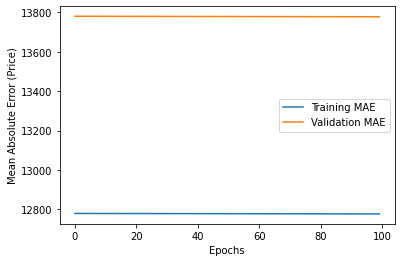

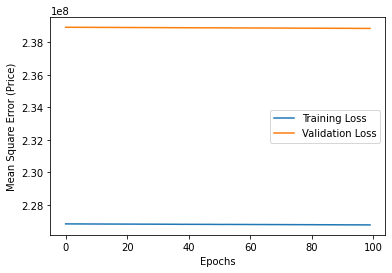

In [ ]:
# Plotting Loss

def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [ ]:
# Making Predictions On Test Data

predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [ ]:
test_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 267780976.0000 - mse: 267780976.0000 - mae: 14066.1104


In [ ]:
print(f"Loss: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[2]}")

Loss: 267780976.0
Mean Absolute Error: 14066.1103515625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

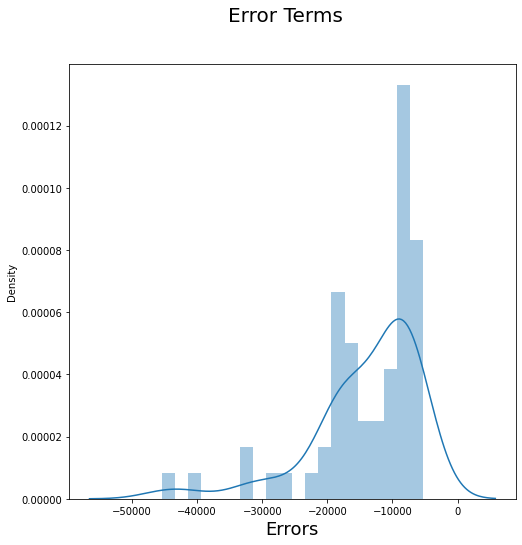

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Making Second Model For Tuning

In [ ]:
# Making Second Model

from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1472      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
# Training Model

history_1 = model2.fit(train_data, train_labels, epochs=1000, verbose = 0, validation_split=0.2)

In [ ]:
# Feeding history_1 In DataFrame

history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
995,15637299.0,15637299.0,2607.630615,7566102.0,7566102.0,2077.454346,995
996,11810451.0,11810451.0,2429.831299,7858337.5,7858337.5,2104.007080,996
997,12856004.0,12856004.0,2438.676025,8343855.5,8343855.5,2148.109619,997
998,14363721.0,14363721.0,2460.678467,7380223.5,7380223.5,2072.442871,998
999,17435318.0,17435318.0,2840.531494,7511707.5,7511707.5,2079.700439,999


In [ ]:
# Feeding history_1 In DataFrame

history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
995,15637299.0,15637299.0,2607.630615,7566102.0,7566102.0,2077.454346,995
996,11810451.0,11810451.0,2429.831299,7858337.5,7858337.5,2104.007080,996
997,12856004.0,12856004.0,2438.676025,8343855.5,8343855.5,2148.109619,997
998,14363721.0,14363721.0,2460.678467,7380223.5,7380223.5,2072.442871,998
999,17435318.0,17435318.0,2840.531494,7511707.5,7511707.5,2079.700439,999


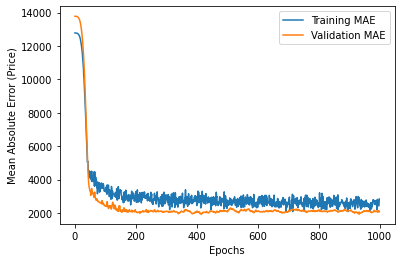

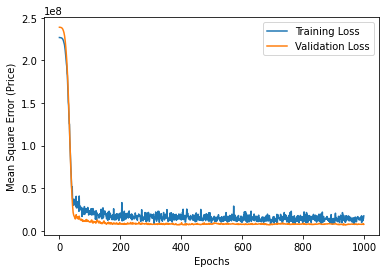

In [ ]:
# Plotting Loss

def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

In [ ]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [ ]:
test1_score = model2.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 13579753.0000 - mse: 13579753.0000 - mae: 2597.4458


In [ ]:


print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 13579753.0
Mean Absolute Error: 2597.44580078125


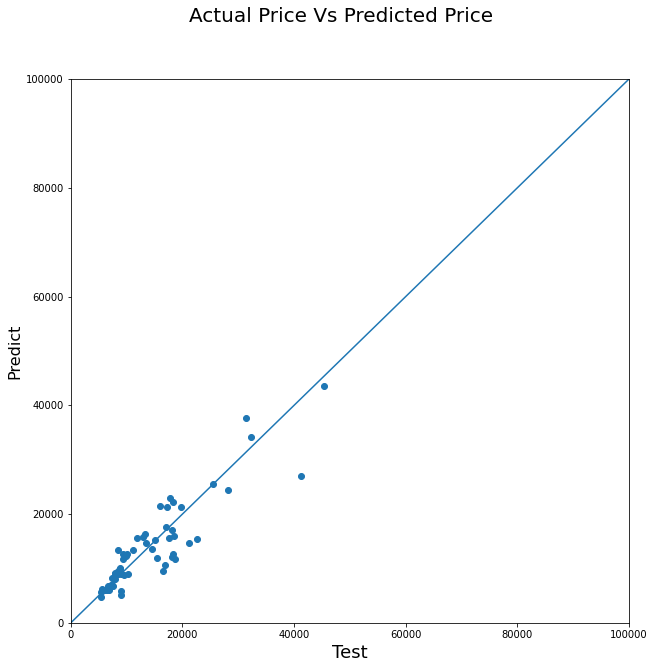

In [ ]:
# Making Price Predictions On Test Data

fig = plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions1)
fig.suptitle('Actual Price Vs Predicted Price', fontsize=20)             
plt.xlabel('Test', fontsize=18)                         
plt.ylabel('Predict', fontsize=16)   
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

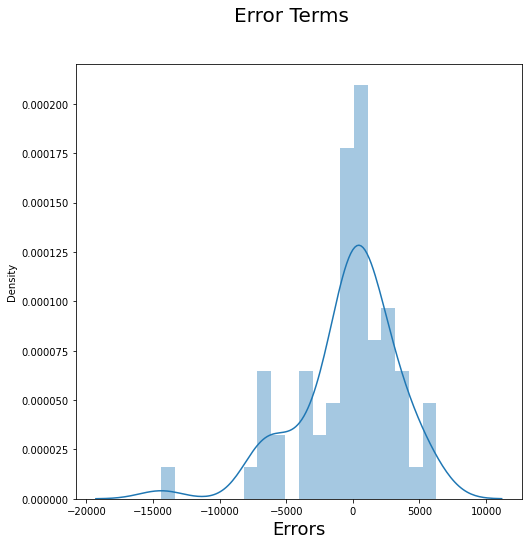

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Building Third Model For Overcoming Overfitting

In [ ]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
from tensorflow.keras.models import Sequential
model3 = Sequential()
model3.add(Dense(128, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               2944      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)

In [ ]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,8199339.5,8199339.5,2115.414307,9340090.0,9340090.0,2242.404053,95
96,11744918.0,11744918.0,2455.660400,9143673.0,9143673.0,2236.268799,96
97,7471001.5,7471001.5,2091.556152,9143516.0,9143516.0,2232.979004,97
98,8293425.0,8293425.0,2143.649902,9130484.0,9130484.0,2235.043213,98
99,8387653.0,8387653.0,2031.994507,8970422.0,8970422.0,2233.856934,99


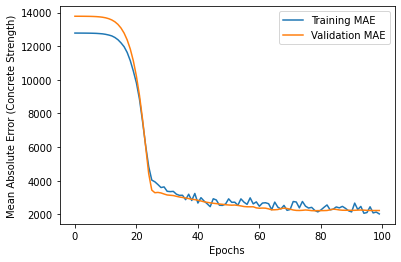

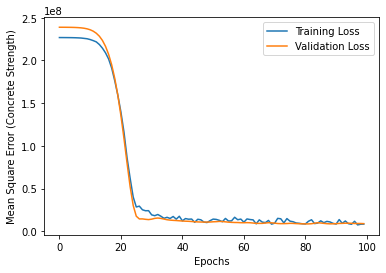

In [ ]:
# Plotting Validation Loss After Overcoming Overfitting
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

In [ ]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()

In [ ]:
test2_score  = model3.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 14236452.0000 - mse: 14236452.0000 - mae: 2687.7197


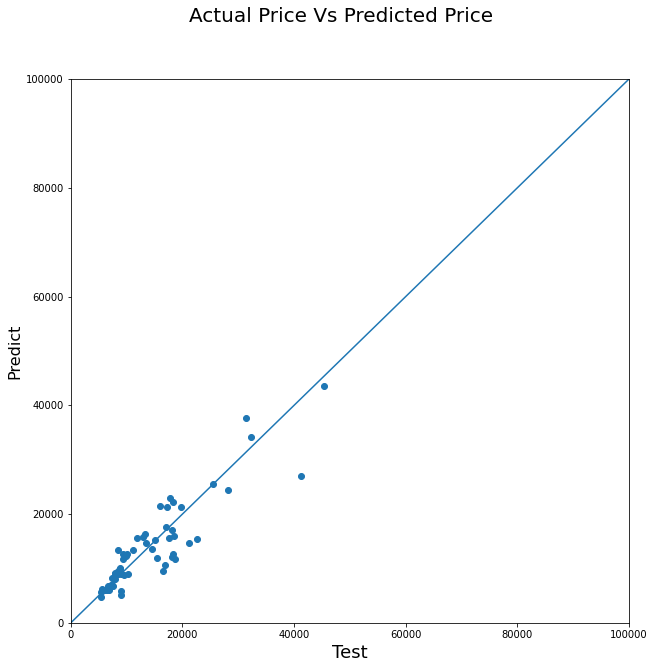

In [ ]:
# Making Price Predictions On Test Data

fig = plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions1)
fig.suptitle('Actual Price Vs Predicted Price', fontsize=20)             
plt.xlabel('Test', fontsize=18)                         
plt.ylabel('Predict', fontsize=16)   
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 14236452.0
Mean Absolute Error: 2687.7197265625


Final Loss: 36823084.0 <br>
Final Mean Absolute Error: 2916.331

In [ ]:
# Saving Appropriate Model
model2.save('CarPricePredictionModel.h5')